In [18]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
# from matplotlib import cmsweep
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

In [19]:
data_RO_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_sea.csv')
data_RO_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_nacl.csv')
data_RO_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_simple.csv')
data_RO_reatoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_reaktoro.csv')

In [20]:
# find errors and create dataframe
results_col = ["LCOW","SEC", "Membrane Area" , "Operating Pressure"] 
error_sea = pd.DataFrame()
error_nacl = pd.DataFrame()
error_simple = pd.DataFrame()

for i in results_col:
    error_sea[i] = 0
    error_nacl[i] = pd.DataFrame(abs(data_RO_seawater[i] - data_RO_nacl[i]) / data_RO_seawater[i]) * 100
    error_simple[i] = pd.DataFrame(abs(data_RO_seawater[i] - data_RO_simple[i]) / data_RO_seawater[i]) * 100



In [21]:
# NaCl errors
for i in results_col:
    print(i)
    print(np.mean(error_nacl[i]))
    

LCOW
6.257593296083981
SEC
7.277577338155652
Membrane Area
0.21783302806505567
Operating Pressure
6.955223527145343


In [22]:
# simple errors
for i in results_col:
    print(i)
    print(np.mean(error_simple[i]))


LCOW
14.24258621016215
SEC
16.519994994542444
Membrane Area
0.3800906062565955
Operating Pressure
13.461328189454504


In [23]:
data_MVC_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_sea.csv')
data_MVC_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_nacl.csv')
data_MVC_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_simple.csv')

In [24]:
# find errors and create dataframe
results_col = ["LCOW","SEC", "Evaporator area" , "Compressor pressure ratio"] 
error_sea = pd.DataFrame()
error_nacl = pd.DataFrame()
error_simple = pd.DataFrame()

for i in results_col:
    error_sea[i] = 0
    error_nacl[i] = pd.DataFrame(abs(data_MVC_seawater[i] - data_MVC_nacl[i]) / data_MVC_seawater[i]) * 100
    error_simple[i] = pd.DataFrame(abs(data_MVC_seawater[i] - data_MVC_simple[i]) / data_MVC_seawater[i]) * 100

In [25]:
# NaCl errors
for i in results_col:
    print(i)
    print(np.mean(error_nacl[i]))

LCOW
0.1436727696594271
SEC
0.3380757354841615
Evaporator area
0.7215265999941194
Compressor pressure ratio
0.16015922543328326


In [26]:
# simple errors
for i in results_col:
    print(i)
    print(np.mean(error_simple[i]))

LCOW
17.103858310210406
SEC
32.854636315012215
Evaporator area
14.91082281950407
Compressor pressure ratio
14.152530417208482


In [27]:
sea_color = "#467740"
nacl_color = "#4A7B9D"
simple_color = "#467740"
reaktoro_color = "#C73E1D"

In [28]:
plt.rcParams.update({'font.size': 11})

In [29]:
title_size = 14

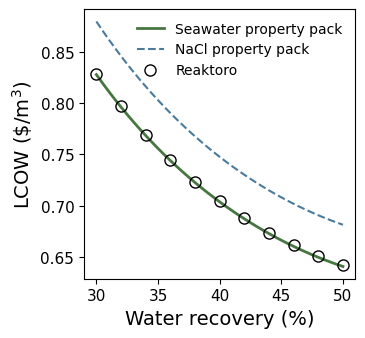

In [69]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(3.5, 3.5))

axs.plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['LCOW'], linewidth=2, color=sea_color)
axs.plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['LCOW'], '--', color=nacl_color)
# axs[0,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['LCOW'], color=simple_color)
axs.plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['LCOW'], "o", ms=8, mfc='none', markevery=4, color='black')
axs.set_xlabel("Water recovery (%)", fontsize=title_size,)
axs.set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size,)


axs.legend(["Seawater property pack","NaCl property pack","Reaktoro"],loc="upper right", frameon=False, fontsize=10,)

fig.savefig("RO_comparison_reaktoro_PSE")

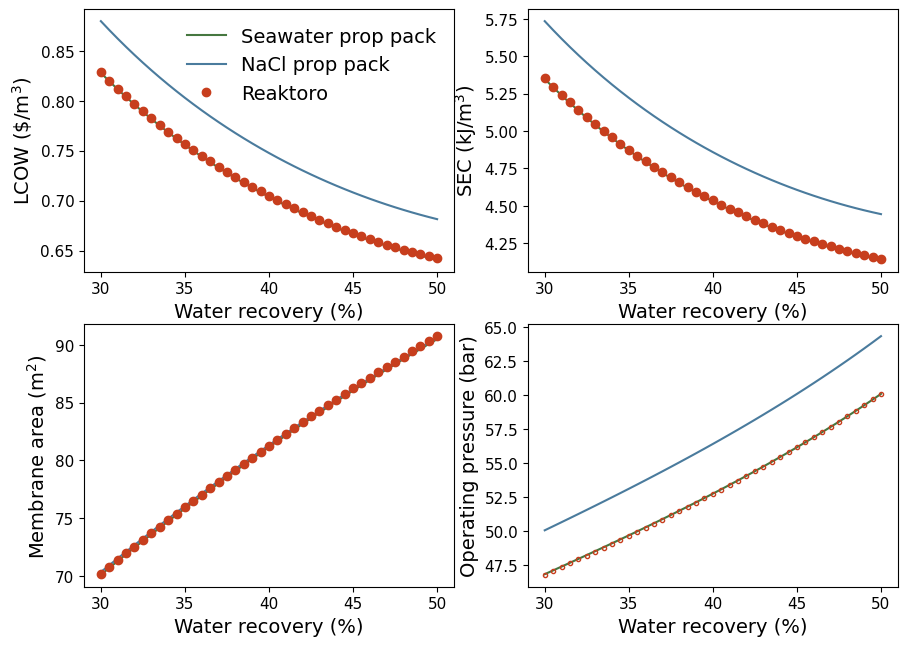

In [30]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*3, 2.5*3)) #figsize=(3.5, 2.5)

axs[0,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['LCOW'], color=sea_color)
axs[0,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['LCOW'], color=nacl_color)
# axs[0,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['LCOW'], color=simple_color)
axs[0,0].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['LCOW'], "o", color=reaktoro_color)
axs[0,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)

axs[0,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['SEC'], color=sea_color)
axs[0,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['SEC'], color=nacl_color)
# axs[0,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['SEC'], color=simple_color)
axs[0,1].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['SEC'], "o", color=reaktoro_color)
axs[0,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

axs[1,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Membrane Area'], color=sea_color)
axs[1,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Membrane Area'], color=nacl_color)
# axs[1,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Membrane Area'], color=simple_color)
axs[1,0].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['Membrane Area'], "o", color=reaktoro_color)
axs[1,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,0].set_ylabel("Membrane area (m$^{2}$)", fontsize=title_size)

axs[1,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Operating Pressure']/1e5, color=sea_color)
axs[1,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Operating Pressure']/1e5, color=nacl_color)
# axs[1,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Operating Pressure']/1e5, color=simple_color)
axs[1,1].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['Operating Pressure']/1e5, "o", ms=3, mfc='none', color=reaktoro_color)

axs[1,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,1].set_ylabel("Operating pressure (bar)", fontsize=title_size)

axs[0,0].legend(["Seawater prop pack","NaCl prop pack","Reaktoro"],loc="upper right", frameon=False,fontsize=14)

fig.savefig("RO_comparison_reaktoro_AICHE")


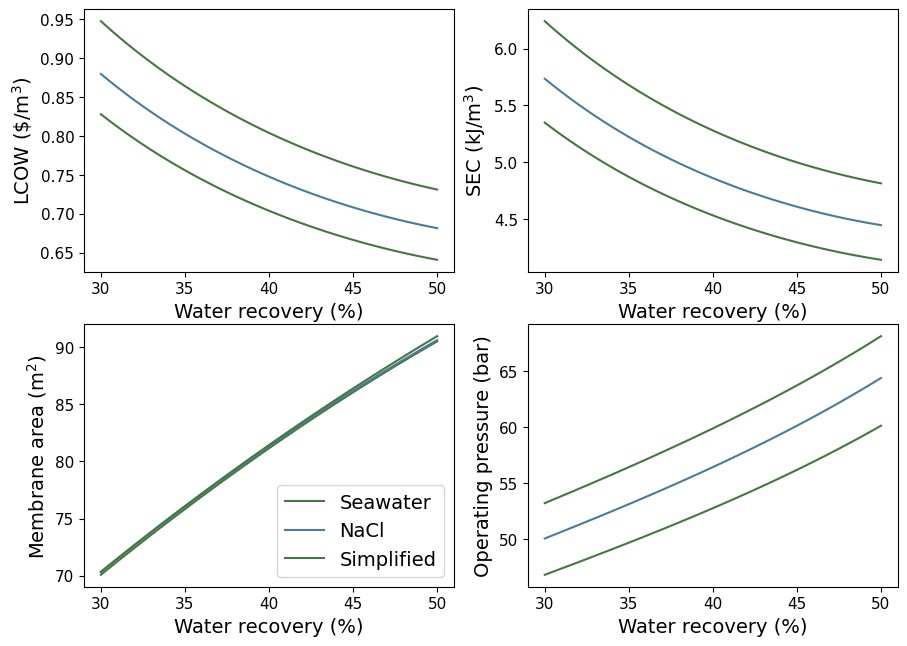

In [31]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*3, 2.5*3)) #figsize=(3.5, 2.5)

axs[0,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['LCOW'], color=sea_color)
axs[0,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['LCOW'], color=nacl_color)
axs[0,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['LCOW'], color=simple_color)
# axs[0,0].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['LCOW'], "-.", color=reaktoro_color)
axs[0,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)

axs[0,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['SEC'], color=sea_color)
axs[0,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['SEC'], color=nacl_color)
axs[0,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['SEC'], color=simple_color)
# axs[0,1].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['SEC'], "-.", color=reaktoro_color)
axs[0,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

axs[1,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Membrane Area'], color=sea_color)
axs[1,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Membrane Area'], color=nacl_color)
axs[1,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Membrane Area'], color=simple_color)
# axs[1,0].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['Membrane Area'], "-.", color=reaktoro_color)
axs[1,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,0].set_ylabel("Membrane area (m$^{2}$)", fontsize=title_size)

axs[1,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Operating Pressure']/1e5, color=sea_color)
axs[1,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Operating Pressure']/1e5, color=nacl_color)
axs[1,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Operating Pressure']/1e5, color=simple_color)
# axs[1,1].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['Operating Pressure']/1e5, "-.", color=reaktoro_color)

axs[1,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,1].set_ylabel("Operating pressure (bar)", fontsize=title_size)

axs[1,0].legend(["Seawater","NaCl","Simplified"], loc="lower right", fontsize=14)

fig.savefig("RO_comparison_AICHE")

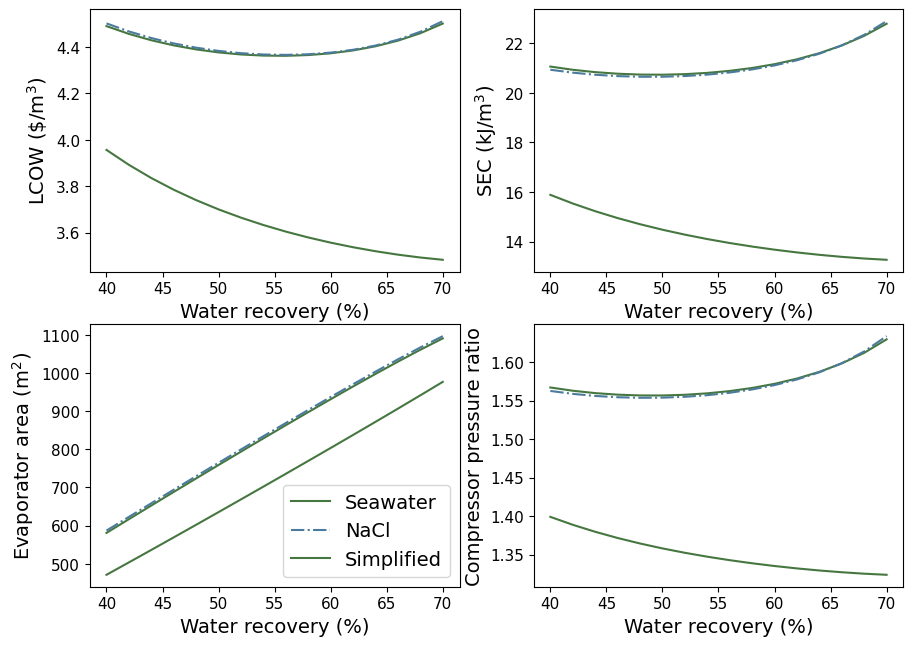

In [32]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*3, 2.5*3))

data_MVC_seawater_low = data_MVC_seawater[(data_MVC_seawater["Inlet Salinity"] == 3.500000e-02) ]
data_MVC_nacl_low = data_MVC_nacl[(data_MVC_nacl["Inlet Salinity"] == 3.500000e-02) ]
data_MVC_simple_low = data_MVC_simple[(data_MVC_simple["Inlet Salinity"] == 3.500000e-02) ]

data_MVC_seawater_hi = data_MVC_seawater[(data_MVC_seawater["Inlet Salinity"] == 7.000000e-02) ]
data_MVC_nacl_hi = data_MVC_nacl[(data_MVC_nacl["Inlet Salinity"] == 7.000000e-02) ] 
data_MVC_simple_hi = data_MVC_simple[(data_MVC_simple["Inlet Salinity"] == 7.000000e-02) ] 

# axs[0,0].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['LCOW'])
# axs[0,0].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['LCOW'])
# axs[0,0].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['LCOW'])
axs[0,0].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['LCOW'], color=sea_color)
axs[0,0].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['LCOW'], "-.", color=nacl_color)
axs[0,0].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['LCOW'], color=simple_color)

axs[0,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,0].set_ylabel("LCOW ($\$$/m$^3$)", fontsize=title_size)

# axs[0,1].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['SEC'])
# axs[0,1].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['SEC'])
# axs[0,1].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['SEC'])
axs[0,1].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['SEC'], color=sea_color)
axs[0,1].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['SEC'], "-.",color=nacl_color)
axs[0,1].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['SEC'], color=simple_color)

axs[0,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[0,1].set_ylabel("SEC (kJ/m$^{3}$)", fontsize=title_size)

# axs[1,0].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['Evaporator area'])
# axs[1,0].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['Evaporator area'])
# axs[1,0].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['Evaporator area'])
axs[1,0].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['Evaporator area'], color=sea_color)
axs[1,0].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['Evaporator area'], "-.", color=nacl_color)
axs[1,0].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['Evaporator area'], color=simple_color)

axs[1,0].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,0].set_ylabel("Evaporator area (m$^{2}$)", fontsize=title_size)

# axs[1,1].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['Compressor pressure ratio'])
# axs[1,1].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['Compressor pressure ratio'])
# axs[1,1].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['Compressor pressure ratio'])
axs[1,1].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['Compressor pressure ratio'], color=sea_color)
axs[1,1].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['Compressor pressure ratio'], "-.", color=nacl_color)
axs[1,1].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['Compressor pressure ratio'], color=simple_color)

axs[1,1].set_xlabel("Water recovery (%)", fontsize=title_size)
axs[1,1].set_ylabel("Compressor pressure ratio", fontsize=title_size)

axs[1,0].legend(["Seawater","NaCl","Simplified"], loc="lower right", fontsize=14)

fig.savefig("MVC_comparison_AICHE")